In [85]:
import pandas as pd
import numpy as np
#from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split#, GridSearchCV,\
#cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler#, OneHotEncoder 
from sklearn.pipeline import Pipeline
#from sklearn.compose import ColumnTransformer

#from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix#,\
#accuracy_score, f1_score, recall_score

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
#from collections import Counter
from imblearn.under_sampling import TomekLinks
#from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 200)

In [46]:
df = pd.read_csv('../data/speed_dating_data.csv')

In [47]:
df

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [8]:
df['match'].value_counts()

0    6998
1    1380
Name: match, dtype: int64

In [7]:
df.isna().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

In [112]:
df['field_cd'].value_counts(normalize = True)

8.0     0.232040
10.0    0.119696
5.0     0.104147
13.0    0.085463
3.0     0.083896
1.0     0.080159
9.0     0.075458
11.0    0.056413
6.0     0.039176
7.0     0.029050
2.0     0.024952
15.0    0.022541
4.0     0.017237
14.0    0.015188
18.0    0.006268
16.0    0.004822
12.0    0.002290
17.0    0.001205
Name: field_cd, dtype: float64

In [115]:
df[(df['match'] == 1) & (df['dec_o'] == 1)]['field_cd'].value_counts(normalize = True)

8.0     0.247438
10.0    0.117862
1.0     0.099561
3.0     0.093704
13.0    0.087116
5.0     0.085652
9.0     0.069546
11.0    0.036603
6.0     0.035139
4.0     0.033675
7.0     0.029283
14.0    0.016837
15.0    0.016105
2.0     0.015373
16.0    0.008785
18.0    0.005857
12.0    0.000732
17.0    0.000732
Name: field_cd, dtype: float64

# Insights

goal:
What is your primary goal in participating in this event? 
	Seemed like a fun night out=1
	To meet new people=2
	To get a date=3
	Looking for a serious relationship=4
	To say I did it=5
	Other=6

date:
In general, how frequently do you go on dates? 
	Several times a week=1
	Twice a week=2
	Once a week=3
	Twice a month=4
	Once a month=5
	Several times a year=6
	Almost never=7

go out:
How often do you go out (not necessarily on dates)?
	Several times a week=1
	Twice a week=2
	Once a week=3
	Twice a month=4
	Once a month=5
	Several times a year=6
	Almost never=7

career:
What is your intended career?
career_c: career coded 
1= Lawyer 
2= Academic/Research 
3= Psychologist 
4= Doctor/Medicine 
5=Engineer 
6= Creative Arts/Entertainment 
7= Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin 
8= Real Estate 
9= International/Humanitarian Affairs 
10= Undecided 
11=Social Work
12=Speech Pathology
13=Politics
14=Pro sports/Athletics
15=Other
16=Journalism
17=Architecture

12.  How interested are you in the following activities, on a scale of 1-10?
sports: Playing sports/ athletics
tvsports: Watching sports
excersice: Body building/exercising
dining: Dining out
museums: Museums/galleries
art: Art
hiking:  Hiking/camping
gaming: Gaming
clubbing: Dancing/clubbing
reading: Reading
tv: Watching TV
theater: Theater
movies: Movies
concerts: Going to concerts
music: Music
shopping: Shopping
yoga: Yoga/meditation

exphappy:
Overall, on a scale of 1-10, how happy do you expect to be with the people you meet 
during the speed-dating event?

expnum: 
Out of the 20 people you will meet, how many do you expect will be interested in dating you? 

We want to know what you look for in the opposite sex. 
Waves 6-9: Please rate the importance of the following attributes in a potential date on a scale of 1-10 (1=not at all important, 10=extremely important):
Waves 1-5, 10-21: You have 100 points to distribute among the following attributes -- give more points to those attributes that are more important in a potential date, and fewer points to those attributes that are less important in a potential date.  Total points must equal 100.
 
attr1_1 
Attractive
sinc1_1
Sincere
intel1_1
Intelligent
fun1_1
Fun
amb1_1
Ambitious
shar1_1
Has shared interests/hobbies

Now we want to know what you think MOST of your fellow men/women look for in the opposite sex.
Waves 6-9: Please rate the importance of the following attributes on a scale of 1-10 (1=not at all important, 10=extremely important):
Waves 10-21 : You have 100 points to distribute among the following attributes -- give more points to those attributes that you think your fellow men/women find more important in a potential date and fewer points to those attributes that they find less important in a potential date.  Total points must equal 100.

attr4_1
Attractive
sinc4_1
Sincere
intel4_1
Intelligent
fun4_1
Fun
amb4_1
Ambitious
shar4_1
Shared Interests/Hobbies



What do you think the opposite sex looks for in a date?
Waves 6-9: Please rate the importance of the following attributes on a scale of 1-10 (1=not at all important, 10=extremely important):
 Waves 1-5 and 10-21: Please distribute 100 points among the following attributes -- give more points to those attributes that you think are more important to members of the opposite sex when they are deciding whether to date someone.  Total points must equal 100.

attr2_1 
Attractive
sinc2_1
Sincere
int2_1
Intelligent
fun2_1
Fun
amb2_1
Ambitious
shar2_1
Has shared interests/hobbies

How do you think you measure up?
Please rate your opinion of your own attributes, on a scale of 1-10 (be honest!):
attr3_1 
Attractive
sinc3_1
Sincere
int3_1
Intelligent
fun3_1
Fun
amb3_1
Ambitious

And finally, how do you think others perceive you? 
Please rate yourself how you think others would rate you on each of the following attributes, on a scale of 1-10 (1=awful, 10=great) 
attr5_1 
Attractive
sinc5_1
Sincere
int5_1
Intelligent
fun5_1
Fun
amb5_1
Ambitious

match_es:
how many matches estimate to get. When both say yes


Distribution of age groups with an average age of 26.


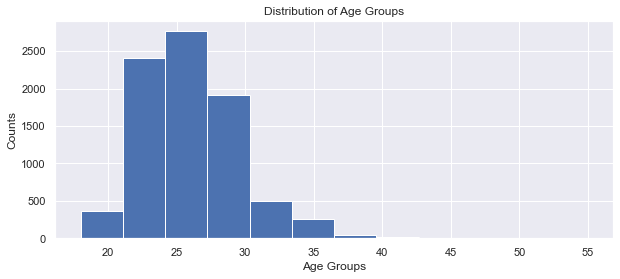

In [67]:
sns.set()
fig, ax = plt.subplots(figsize = (10, 4))

ax.hist(df['age_o'],
        bins = 12)

ax.set_title('Distribution of Age Groups')
ax.set_xlabel('Age Groups')
ax.set_ylabel('Counts');

mean_age = round(df['age_o'].mean())
print(f'Distribution of age groups with an average age of {mean_age}.')

# Data Cleaning

In [28]:
#Select only columns with information prior to dating
df_clean = df.loc[:,'iid':'amb5_1']
#Drop additional columns contain post meeting information
df_clean.drop(columns = ['dec_o', 'attr_o', 'sinc_o', 'intel_o',
                         'fun_o', 'amb_o', 'shar_o', 'like_o',
                         'prob_o', 'met_o'], inplace = True)

#Add entry on whether participants had met before or not
df_clean['met'] = df['met']

#List of survey columns
columns = df_clean.loc[:,'attr1_1':'amb5_1'].columns.tolist()

#Iterate through rows, marking 0 if value was missing
for col in columns:
    df_clean[col+'_na'] = np.where(df_clean[col].isna(), 0, 1)

#Fill NaN values in survey columns with 0
df_clean[columns] = df_clean[columns].fillna(0)

#Indicate whether survey was out of 10 or 100
df_clean['survey_10'] = np.where(df_clean['wave'].isin(range(6,10)), 1, 0)
df_clean['survey_100'] = np.where(df_clean['wave'].isin(range(6,10)) == False, 1, 0)

#Drop exp num due to large majority NaN values
df_clean.drop(columns = 'expnum', inplace = True)

#Drop additional columns
df_clean.drop(columns = ['iid', 'id', 'idg', 'wave', 'position', 'positin1', 'partner', 'pid',
                         'field', 'mn_sat', 'tuition', 'income', 'undergra'], inplace = True)

df_clean.drop(columns = ['zipcode', 'career', 'from'], inplace = True)
df_clean.dropna(inplace = True)
df_clean.reset_index(drop = True, inplace = True)

In [114]:
df_clean

,gender,condtn,round,order,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,met,attr1_1_na,sinc1_1_na,intel1_1_na,fun1_1_na,amb1_1_na,shar1_1_na,attr4_1_na,sinc4_1_na,intel4_1_na,fun4_1_na,amb4_1_na,shar4_1_na,attr2_1_na,sinc2_1_na,intel2_1_na,fun2_1_na,amb2_1_na,shar2_1_na,attr3_1_na,sinc3_1_na,fun3_1_na,intel3_1_na,amb3_1_na,attr5_1_na,sinc5_1_na,intel5_1_na,fun5_1_na,amb5_1_na,survey_10,survey_100
0,0,1,10,3,0,-0.18,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,23.0,1.0,2.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,20.0,20.0,20.0,20.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,10.0,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,2.0,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1
1,0,1,10,2,0,-0.18,1,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,23.0,1.0,2.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,20.0,20.0,20.0,20.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,10.0,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1
2,0,1,10,9,0,0.05,0,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,23.0,1.0,2.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,20.0,20.0,20.0,20.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,10.0,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,2.0,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1
3,0,1,10,4,1,-0.18,1,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,23.0,1.0,2.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,20.0,20.0,20.0,20.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,10.0,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1
4,0,1,10,6,0,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,23.0,1.0,2.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,20.0,20.0,20.0,20.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,10.0,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,2.0,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7696,1,2,22,8,0,0.28,1,24.0,2.0,10.0,15.0,30.0,20.0,15.0,10.0,25.0,18.0,2.0,1.0,1.0,1.0,2.0,1.0,15.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,70.0,0.0,15.0,15.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,10.0,50.0,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0,9.0,7.0,10.0,5.0,9.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
7697,1,2,22,5,0,0.64,0,26.0,3.0,10.0,10.0,30.0,20.0,10.0,15.0,25.0,18.0,2.0,1.0,1.0,1.0,2.0,1.0,15.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,70.0,0.0,15.0,15.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,10.0,50.0,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0,9.0,7.0,10.0,5.0,9.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
7698,1,2,22,4,0,0.71,0,24.0,6.0,50.0,20.0,10.0,5.0,10.0,5.0,25.0,18.0,2.0,1.0,1.0,1.0,2.0,1.0,15.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,70.0,0.0,15.0,15.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,10.0,50.0,0.0

In [79]:
df_clean.loc[:,'gender':'exphappy'].isna().sum()

gender         0
condtn         0
round          0
order          0
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
age           95
field_cd      82
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      79
reading       79
tv            79
theater       79
movies        79
concerts      79
music         79
shopping      79
yoga          79
exphappy     101
dtype: int64

In [82]:
df_clean[columns].isna().sum()

attr1_1     0
sinc1_1     0
intel1_1    0
fun1_1      0
amb1_1      0
shar1_1     0
attr4_1     0
sinc4_1     0
intel4_1    0
fun4_1      0
amb4_1      0
shar4_1     0
attr2_1     0
sinc2_1     0
intel2_1    0
fun2_1      0
amb2_1      0
shar2_1     0
attr3_1     0
sinc3_1     0
fun3_1      0
intel3_1    0
amb3_1      0
attr5_1     0
sinc5_1     0
intel5_1    0
fun5_1      0
amb5_1      0
dtype: int64

# Base Model

In [ ]:
df_clean['match'].value_counts(normalize = True)

In [80]:
y = df_clean['match']
X = df_clean.drop(columns = ['match'])

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42)

In [66]:
log_reg_pipe = Pipeline([
        ('std_scaler', StandardScaler()),
        ('upsampled_lr', LogisticRegression(random_state = 42)),
])

In [67]:
log_reg_pipe.fit(X_train, y_train)

train_pred_base = log_reg_pipe.predict(X_train_ss_base)
test_pred_base = log_reg_pipe.predict(X_test_ss_base)

print(classification_report(y_train, train_pred_base))
print(classification_report(y_test, test_pred_base))

              precision    recall  f1-score   support

           0       1.00      0.00      0.01      4816
           1       0.17      1.00      0.29       959

    accuracy                           0.17      5775
   macro avg       0.58      0.50      0.15      5775
weighted avg       0.86      0.17      0.05      5775

              precision    recall  f1-score   support

           0       1.00      0.00      0.01      1584
           1       0.18      1.00      0.30       342

    accuracy                           0.18      1926
   macro avg       0.59      0.50      0.15      1926
weighted avg       0.85      0.18      0.06      1926



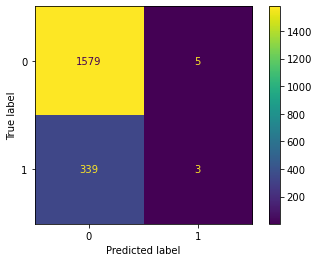

In [44]:
plot_confusion_matrix(base_model, X_test_ss_base, y_test)

In [69]:
unmatched = df_clean[df_clean['match'] == 0]
matched = df_clean[df_clean['match'] == 1]

matched_upsampled = resample(matched,
                             replace=True,
                             n_samples=len(matched)*3,
                             random_state=42)
upsampled = pd.concat([unmatched, matched_upsampled])
y_upsampled = upsampled['match']
X_upsampled = upsampled.drop(columns = 'match')

X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled, y_upsampled,
                                                                                            random_state = 42)

log_reg_pipe.fit(X_train_upsampled, y_train_upsampled)
upsample_pred = log_reg_pipe.predict(X_test_upsampled)
print(classification_report(y_train_upsampled, log_reg_pipe.predict(X_train_upsampled)))
print(classification_report(y_test_upsampled, upsampled_pred))

              precision    recall  f1-score   support

           0       0.66      0.87      0.75      4764
           1       0.57      0.28      0.38      2963

    accuracy                           0.64      7727
   macro avg       0.62      0.57      0.56      7727
weighted avg       0.63      0.64      0.61      7727

              precision    recall  f1-score   support

           0       0.68      0.87      0.77      1636
           1       0.57      0.29      0.39       940

    accuracy                           0.66      2576
   macro avg       0.63      0.58      0.58      2576
weighted avg       0.64      0.66      0.63      2576



In [72]:
matched_downsampled = resample(unmatched,
                             replace=False,
                             n_samples=len(matched)*3,
                             random_state=42)

downsampled = pd.concat([matched, matched_downsampled])
y_downsampled = downsampled['match']
X_downsampled = downsampled.drop(columns = 'match')

X_train_downsampled, X_test_downsampled,\
y_train_downsampled, y_test_downsampled = train_test_split(X_downsampled, y_downsampled,
                                                           random_state = 42)

log_reg_pipe.fit(X_train_downsampled, y_train_downsampled)
downsample_pred = log_reg_pipe.predict(X_test_downsampled)
print(classification_report(y_train_downsampled, log_reg_pipe.predict(X_train_downsampled)))
print(classification_report(y_test_downsampled, downsample_pred))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      2952
           1       0.61      0.05      0.09       951

    accuracy                           0.76      3903
   macro avg       0.69      0.52      0.47      3903
weighted avg       0.73      0.76      0.67      3903

              precision    recall  f1-score   support

           0       0.74      0.99      0.84       951
           1       0.58      0.04      0.07       350

    accuracy                           0.73      1301
   macro avg       0.66      0.51      0.46      1301
weighted avg       0.70      0.73      0.64      1301



In [87]:
sm = SMOTE(random_state = 42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
log_reg_pipe.fit(X_train_sm, y_train_sm)
sm_pred = log_reg_pipe.predict(X_test)
print(classification_report(y_train_sm, log_reg_pipe.predict(X_train_sm)))
print(classification_report(y_test, sm_pred))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65      4816
           1       0.65      0.67      0.66      4816

    accuracy                           0.66      9632
   macro avg       0.66      0.66      0.66      9632
weighted avg       0.66      0.66      0.66      9632

              precision    recall  f1-score   support

           0       0.85      0.64      0.73      1584
           1       0.23      0.49      0.31       342

    accuracy                           0.62      1926
   macro avg       0.54      0.56      0.52      1926
weighted avg       0.74      0.62      0.66      1926



In [88]:
tl = TomekLinks()
X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train)
log_reg_pipe.fit(X_train_tl, y_train_tl)
tl_pred = log_reg_pipe.predict(X_test)
print(classification_report(y_train_tl, log_reg_pipe.predict(X_train_tl)))
print(classification_report(y_test, tl_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90      4506
           1       0.60      0.02      0.03       959

    accuracy                           0.83      5465
   macro avg       0.71      0.51      0.47      5465
weighted avg       0.79      0.83      0.75      5465

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1584
           1       0.33      0.01      0.02       342

    accuracy                           0.82      1926
   macro avg       0.58      0.50      0.46      1926
weighted avg       0.74      0.82      0.75      1926

